In [1]:
%pylab inline
plt.style.use("bmh")
plt.rcParams["figure.figsize"] = (6,6)

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pathlib
import pandas as pd

In [3]:
DATA_DIR = pathlib.Path("CMAPSSData/")

# Loading data

In [4]:
DATASET = "FD001"
fd001 = pd.read_table(DATA_DIR.joinpath(f"train_{DATASET}.txt"), header=None, delimiter="\s")

<ipython-input-4-7d8ea423bc55>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  fd001 = pd.read_table(DATA_DIR.joinpath(f"train_{DATASET}.txt"), header=None, delimiter="\s")


In [5]:
fd001.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


Text(0, 0.5, 'num instances')

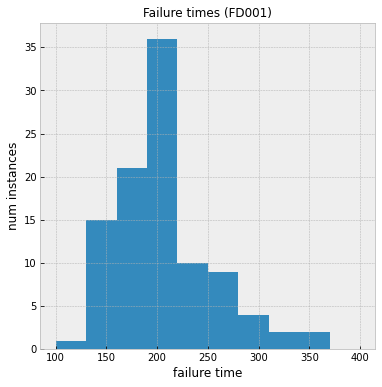

In [6]:
fd001.groupby(0).size().plot(kind="hist", range=(100, 400), bins=10)
plt.title(f"Failure times ({DATASET})", fontsize=12)
plt.xlabel("failure time")
plt.ylabel("num instances")

# Survival function

In [7]:
from lifelines import KaplanMeierFitter

In [8]:
kmf = KaplanMeierFitter()
kmf.fit(fd001.groupby(0).size().values)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 100 total observations, 0 right-censored observations>

Text(0, 0.5, 'P(T>t)')

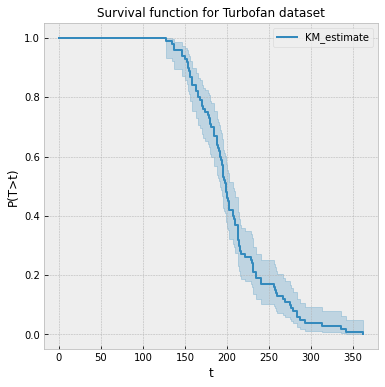

In [9]:
kmf.plot_survival_function()
plt.title("Survival function for Turbofan dataset", fontsize=12)
plt.xlabel("t")
plt.ylabel("P(T>t)")